# Installing Libraries.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import spacy

from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import nltk
from nltk.corpus import stopwords
'''nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')'''

"nltk.download('stopwords')\nnltk.download('punkt')\nnltk.download('wordnet')"

# Web scraping
This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web and saved it into a local .csv file.

Scraping data from Skytrax
If we visit [https://www.airlinequality.com] we can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If we navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] we will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 34
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
# Creating Data Frame of reviews and setting column name for reviews.
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | At Copenhagen the most chaotic...
1,✅ Trip Verified | Worst experience of my life...
2,✅ Trip Verified | Due to code sharing with Ca...
3,✅ Trip Verified | LHR check in was quick at t...
4,✅ Trip Verified | I wouldn't recommend Britis...


In [5]:
# Saving reviews to local csv file
df.to_csv("BA_reviews.csv")

In [6]:
print(f"{len(reviews)} total reviews")

3400 total reviews


We have 3400 reviews in total

# Data Import and Data Cleaning 

In [7]:
# Importing Data
data= pd.read_csv('BA_reviews.csv')

In [8]:
data

,Unnamed: 0,reviews
0,0,Not Verified | At Copenhagen the most chaotic...
1,1,✅ Trip Verified | Worst experience of my life...
2,2,✅ Trip Verified | Due to code sharing with Ca...
3,3,✅ Trip Verified | LHR check in was quick at t...
4,4,✅ Trip Verified | I wouldn't recommend Britis...
...,...,...
3395,3395,Flew LHR to Larnaca and return 22nd April and ...
3396,3396,"LHR-SEA in ""first"" class. The experience was r..."
3397,3397,I had flight from Vancouver to London and back...
3398,3398,London Gatwick to Bridgetown on Avios companio...


In [9]:
# droping extra index column
data.drop('Unnamed: 0',inplace=True,axis=1)
data

,reviews
0,Not Verified | At Copenhagen the most chaotic...
1,✅ Trip Verified | Worst experience of my life...
2,✅ Trip Verified | Due to code sharing with Ca...
3,✅ Trip Verified | LHR check in was quick at t...
4,✅ Trip Verified | I wouldn't recommend Britis...
...,...
3395,Flew LHR to Larnaca and return 22nd April and ...
3396,"LHR-SEA in ""first"" class. The experience was r..."
3397,I had flight from Vancouver to London and back...
3398,London Gatwick to Bridgetown on Avios companio...


In [10]:
# Reviews to lower case
data['reviews']=data['reviews'].apply(lambda x : x.lower())
# Removing extra blank spaces from start and end.
data['reviews']=data['reviews'].apply(lambda x : x.strip())
data['reviews']

0       not verified |  at copenhagen the most chaotic...
1       ✅ trip verified |  worst experience of my life...
2       ✅ trip verified |  due to code sharing with ca...
3       ✅ trip verified |  lhr check in was quick at t...
4       ✅ trip verified |  i wouldn't recommend britis...
                              ...                        
3395    flew lhr to larnaca and return 22nd april and ...
3396    lhr-sea in "first" class. the experience was r...
3397    i had flight from vancouver to london and back...
3398    london gatwick to bridgetown on avios companio...
3399    london - bkk premium economy 19/6/14. i always...
Name: reviews, Length: 3400, dtype: object

**Rule-based approach**  
  
This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach   
    
Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.  
  
Data preprocessing steps:  
  
*Cleaning the text  
*Tokenization  
*Stopwords removal  
*Obtaining the stem words  

In [11]:
# data cleaning
data['reviews']=data['reviews'].apply(lambda x : x.replace('not verified |',''))
data['reviews']=data['reviews'].apply(lambda x : x.replace('✅ trip verified |',''))
data['reviews']=data['reviews'].apply(lambda x : x.strip())

**re.sub('[^a-zA-Z]',' ', x )**  

This is a regular expression in Python, specifically using the re module, that replaces any non-alphabetic character in the string x with a space.   

Here's a breakdown of what each component of the regular expression means:  

[^a-zA-Z] matches any character that is not a letter, either lowercase or uppercase. The ^ inside the square brackets means "not".   
' ' is the replacement string, which replaces any matched character with a space.  
x is the input string to which the regular expression is applied.  
Overall, this regular expression can be used to clean up a string by removing any non-alphabetic characters and replacing them with a space.   

In [12]:
# Removing special Character
import re
data['no_special_char']=data['reviews'].apply(lambda x: re.sub('[^a-zA-Z]',' ', x ))

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#stopwords = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
no_of_words=[]
cleaned_reviews = []
for review in data['no_special_char']:
    # breaking sentance into words
    tokens = word_tokenize(review)
    counts= len(tokens)
    cleaned_tokens = [wnl.lemmatize(token) for token in tokens if not token in stopwords.words('english')]
    cleaned_tokens = [word for word in cleaned_tokens if len(word) >= 3]
    cleaned_reviews.append(' '.join(cleaned_tokens))
    no_of_words.append(counts)

In [14]:
len(cleaned_reviews)

3400

In [15]:
# no_of_words contains the size of each review
len(no_of_words)

3400

It prints the top 3 words for each of the 5 topics generated by the LDA model. The top words for each topic are     obtained by sorting the topic components in decreasing order and selecting the top 5 words using the argsort method on the   topic array, and retrieving their corresponding feature names using the get_feature_names_out() method of the vectorizer object.  

In [23]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer matrix
vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
count_matrix = vectorizer.fit_transform(cleaned_reviews)

# Create a LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0, max_iter=10, learning_method='online')
lda.fit(count_matrix)

# Print the top 10 words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-3 :-1]]))
    print()

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic #0:
seat food

Topic #1:
seat service

Topic #2:
check boarding

Topic #3:
thank tier

Topic #4:
airway british



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics and other LDA parameters
num_topics = 5
max_iterations = 30
learning_offset = 50.
learning_method = 'online'

# Create a TF-IDF vectorizer and fit it to the data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_reviews)

# Create an LDA model and fit it to the TF-IDF matrix
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=max_iterations,
                                learning_offset=learning_offset, learning_method=learning_method)
lda.fit(tfidf_matrix)

# Print the top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-5:-1]]))
    print()

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic #0:
funeral applying mainline obliged

Topic #1:
flight seat service good

Topic #2:
funeral applying mainline obliged

Topic #3:
funeral applying mainline obliged

Topic #4:
funeral applying mainline obliged



In [26]:
joined_string=' '.join(cleaned_reviews)

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
import nltk
from collections import Counter
import pandas as pd


# Tokenize the letter into words
words = nltk.word_tokenize(joined_string)

# Remove stopwords and punctuation
stopwords = nltk.corpus.stopwords.words('english')
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]

# Count the frequency of each word
word_counts = Counter(words)

# Convert the word counts to a data frame
count_frequency = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])

# Sort the data frame by count in descending order
count_frequency = count_frequency.sort_values(by='Count', ascending=False)

# Print the first 10 rows of the data frame
print(count_frequency.head(10))

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         Count
flight    7201
seat      4191
service   2766
time      2238
food      2212
london    2129
crew      2046
british   2028
airway    2026
good      1952


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


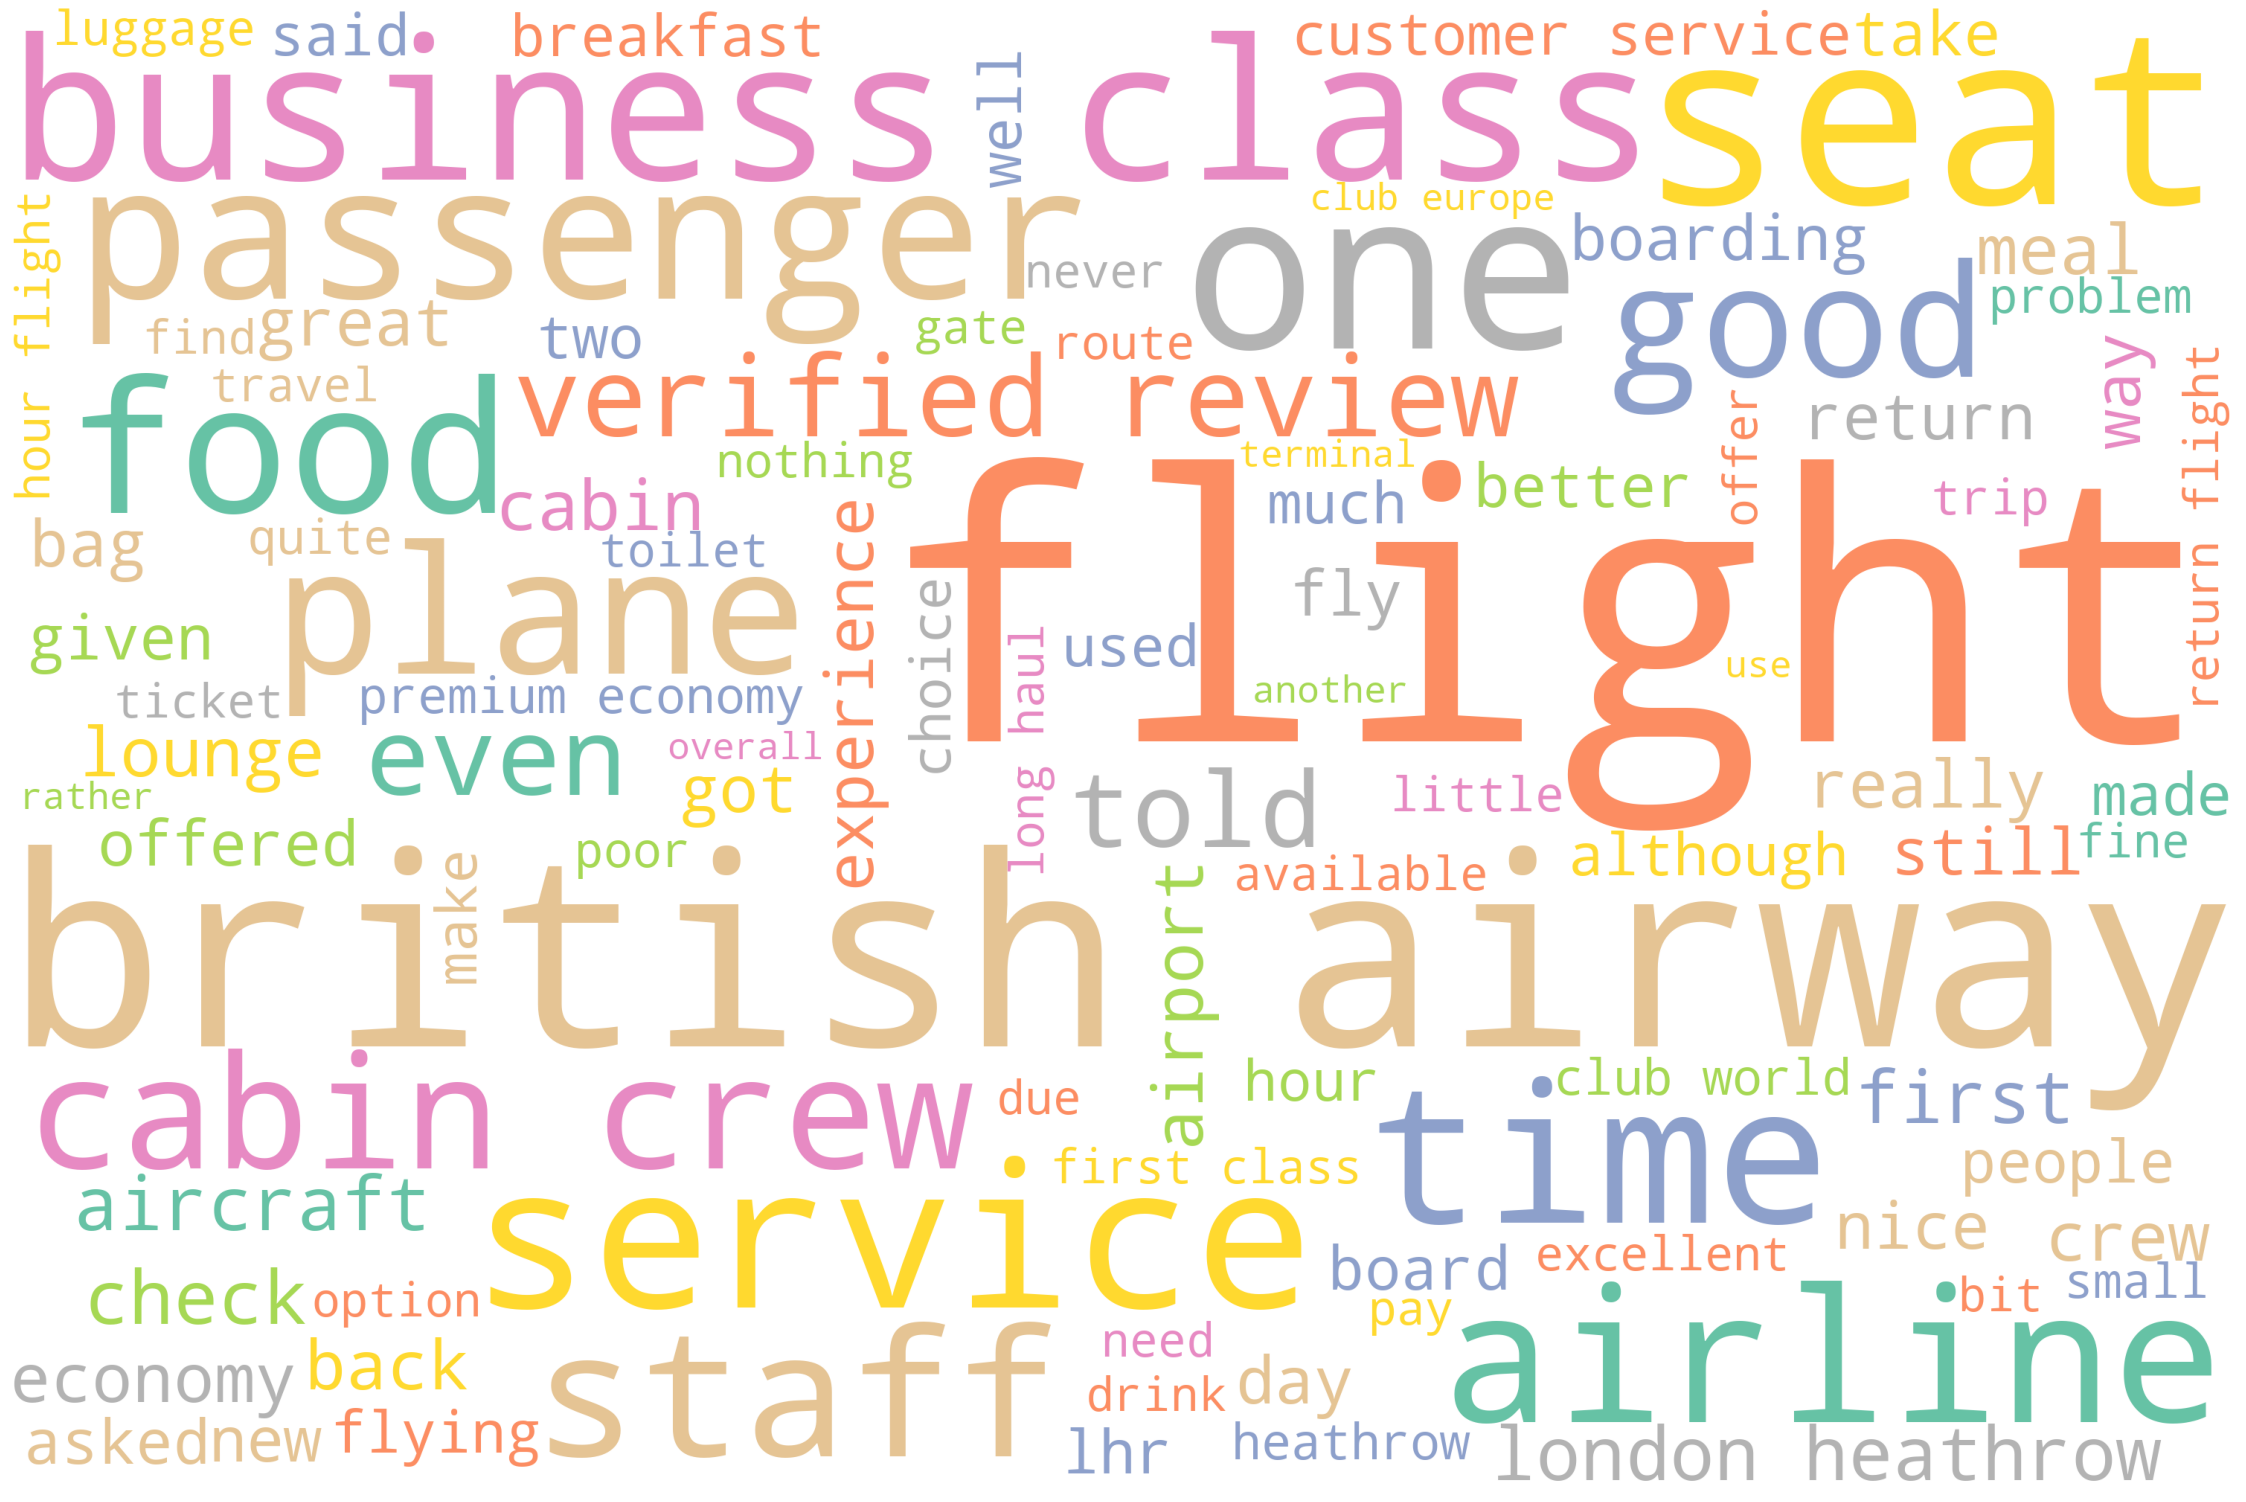

In [28]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
joined_string = ' '.join(cleaned_reviews)
joined_string
    
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='white', max_words=100,colormap='Set2',stopwords=stopwords).generate(joined_string)
# Plot
plot_cloud(wordcloud)
plt.savefig('word_cloud1.png')

In [29]:
plt.savefig('word_cloud.png')

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 432x288 with 0 Axes>

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_reviews)

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
df1=pd.DataFrame({'Word':vectorizer.vocabulary_.keys(),"Count":vectorizer.vocabulary_.values()})
df1.shape

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10799, 2)

In [33]:
df1.dtypes

Word     object
Count     int64
dtype: object

**Top 10 pairs of word present in the reviews** 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer


# Initialize CountVectorizer object with ngram_range (2,2) to count 2-word pairs
count_vectorizer = CountVectorizer(ngram_range=(2,2))

# Fit and transform the text data using CountVectorizer
count_matrix = count_vectorizer.fit_transform(cleaned_reviews)

# Get the feature names (2-word pairs)
#features = count_vectorizer.get_feature_names_out()

# get the bigram counts by summing the rows of the bigram matrix
count_matrix = count_matrix.sum(axis=0)

# get the feature names (bigrams) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# create a dictionary of bigram counts
bigram_count_dict = {}
for i in range(len(feature_names)):
    bigram_count_dict[feature_names[i]] = count_matrix[0,i]


sorted_dict = dict(sorted(bigram_count_dict.items(), key=lambda x: x[1]))

# Print the sorted dictionary
last_10 = list(sorted_dict.items())[:-10:-1]
for i in last_10:
    print(i)

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('british airway', 1953)
('business class', 1031)
('cabin crew', 818)
('verified review', 771)
('london heathrow', 656)
('customer service', 406)
('premium economy', 363)
('club world', 356)
('return flight', 318)


In [52]:
from textblob import TextBlob

# Define a function to perform sentiment analysis on a given text
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage
data['sentiment']=data['no_special_char'].apply(lambda x : sentiment_analysis(x))


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
data['word_count'] = data['no_special_char'].str.split().apply(len)
data.head(10)

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews,no_special_char,sentiment,word_count
0,at copenhagen the most chaotic ticket counter ...,at copenhagen the most chaotic ticket counter ...,Positive,30
1,worst experience of my life trying to deal wit...,worst experience of my life trying to deal wit...,Negative,169
2,due to code sharing with cathay pacific i was ...,due to code sharing with cathay pacific i was ...,Negative,204
3,lhr check in was quick at the first wing and q...,lhr check in was quick at the first wing and q...,Positive,313
4,i wouldn't recommend british airways at all. i...,i wouldn t recommend british airways at all i...,Negative,196
5,absolutely horrible experience. i booked a tic...,absolutely horrible experience i booked a tic...,Negative,249
6,this is the worst airline. not one thing went ...,this is the worst airline not one thing went ...,Negative,36
7,i will never fly british airways again. to sta...,i will never fly british airways again to sta...,Negative,97
8,worst aircraft i have ever flown. the seats we...,worst aircraft i have ever flown the seats we...,Negative,88
9,i enjoyed my flight. the boarding was swift an...,i enjoyed my flight the boarding was swift an...,Positive,69


In [54]:
from textblob import TextBlob
data['sentiment_polarity']=data['no_special_char'].apply(lambda x : TextBlob(x).sentiment.polarity)
data.head(10)

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews,no_special_char,sentiment,word_count,sentiment_polarity
0,at copenhagen the most chaotic ticket counter ...,at copenhagen the most chaotic ticket counter ...,Positive,30,0.150000
1,worst experience of my life trying to deal wit...,worst experience of my life trying to deal wit...,Negative,169,-0.062321
2,due to code sharing with cathay pacific i was ...,due to code sharing with cathay pacific i was ...,Negative,204,-0.008929
3,lhr check in was quick at the first wing and q...,lhr check in was quick at the first wing and q...,Positive,313,0.111402
4,i wouldn't recommend british airways at all. i...,i wouldn t recommend british airways at all i...,Negative,196,-0.057619
5,absolutely horrible experience. i booked a tic...,absolutely horrible experience i booked a tic...,Negative,249,-0.170000
6,this is the worst airline. not one thing went ...,this is the worst airline not one thing went ...,Negative,36,-0.428571
7,i will never fly british airways again. to sta...,i will never fly british airways again to sta...,Negative,97,-0.038636
8,worst aircraft i have ever flown. the seats we...,worst aircraft i have ever flown the seats we...,Negative,88,-0.149306
9,i enjoyed my flight. the boarding was swift an...,i enjoyed my flight the boarding was swift an...,Positive,69,0.258750


In [55]:
data.sentiment.value_counts()

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sentiment
Positive    2398
Negative     989
Neutral       13
Name: count, dtype: int64

In [56]:
Postive_to_negative=data.sort_values(by='sentiment_polarity',ascending=False)
Postive_to_negative= Postive_to_negative.reset_index(drop=True)
Postive_to_negative

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews,no_special_char,sentiment,word_count,sentiment_polarity
0,very impressed with premium economy on ba sydn...,very impressed with premium economy on ba sydn...,Positive,26,0.800000
1,flew ba 025 heathrow to hong kong in first cla...,flew ba heathrow to hong kong in first cla...,Positive,43,0.725000
2,gatwick to st lucia. great service on this fli...,gatwick to st lucia great service on this fli...,Positive,23,0.715000
3,bhd-lhr. i flew ba from belfast george best ai...,bhd lhr i flew ba from belfast george best ai...,Positive,37,0.709273
4,dubai to london heathrow. lovely flight and a ...,dubai to london heathrow lovely flight and a ...,Positive,75,0.705000
...,...,...,...,...,...
3395,terrible. flight time is well over 2 hours. se...,terrible flight time is well over hours se...,Negative,59,-0.579167
3396,san francisco to london. terrible service and ...,san francisco to london terrible service and ...,Negative,36,-0.613333
3397,miami to london. the breakfast served just bef...,miami to london the breakfast served just bef...,Negative,37,-0.622917
3398,stockholm to london. worst business class flig...,stockholm to london worst business class flig...,Negative,38,-0.650000


**Most Postive review**

In [57]:
Postive_to_negative.loc[0,"reviews"]

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'very impressed with premium economy on ba sydney to heathrow and return. nice also to have an unsolicited upgrade to business on return singapore to sydney.'

**Most negative review**

In [58]:

Postive_to_negative.iloc[-1,0]

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'mykonos to london flight delayed and waiting to depart. they are not on time, be prepared to miss your connections, take off 2 hours late,. the staff is some of the worst i have had on airlines. you may be stuck on the runway and they won’t offer you any water.  the worst business class experience i have had.'

**Longest Review**

In [70]:
print(data.sort_values(by='word_count',ascending=False).iloc[0,0])
print(data.sort_values(by='word_count',ascending=False).iloc[0,3])

hong kong to copenhagen via london. the whole experience is a nightmare to me and my wife. my wife lost her luggage ever since the first day of our journey on 1st august because our two pieces of luggage were left in heathrow airport by ba staff when we took the transit flight from the uk to copenhagen. we went to menzies in cph and they filed a repor. we stated in the missing report that if the luggage was found, they should be sent to our air b&b house in marstal in cph on or before 3rd august or deliver to the hotel we stayed in cph if they were found on 4th august. on 2nd august, we found that the updated status of our missing luggage in the ba website showed that one of our luggage was found while another one had a possible match. therefore, we kept phoning and emailing menzies staff to urge them to send the luggage to our house but they failed to do so. and the website status showed that we chose to pick up the luggage in the airport, which was not our preference but we failed to

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Shortest Review**

In [71]:
print(data.sort_values(by='word_count',ascending=False).iloc[-1,0])
print(data.sort_values(by='word_count',ascending=False).iloc[-1,3])

no problems on this short flight. left and arrived on time. drink and snack served.
15


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
data.sort_values(by='sentiment_polarity',ascending=False).head(10)

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews,no_special_char,sentiment,word_count,sentiment_polarity
3185,very impressed with premium economy on ba sydn...,very impressed with premium economy on ba sydn...,Positive,26,0.800000
3383,flew ba 025 heathrow to hong kong in first cla...,flew ba heathrow to hong kong in first cla...,Positive,43,0.725000
532,gatwick to st lucia. great service on this fli...,gatwick to st lucia great service on this fli...,Positive,23,0.715000
3244,bhd-lhr. i flew ba from belfast george best ai...,bhd lhr i flew ba from belfast george best ai...,Positive,37,0.709273
1024,dubai to london heathrow. lovely flight and a ...,dubai to london heathrow lovely flight and a ...,Positive,75,0.705000
610,edinburgh to kuala lumpur via london. i have j...,edinburgh to kuala lumpur via london i have j...,Positive,88,0.673333
1193,flew from london heathrow to belfast george be...,flew from london heathrow to belfast george be...,Positive,47,0.670000
509,stockholm to london heathrow. as always ba wor...,stockholm to london heathrow as always ba wor...,Positive,48,0.666667
2936,heathrow - mexico and cancun - gatwick in econ...,heathrow mexico and cancun gatwick in econ...,Positive,24,0.663333
164,"for this 5 hour 15 min flight, you are given a...",for this hour min flight you are given a...,Positive,112,0.650000


In [60]:
data.sort_values(by='sentiment_polarity',ascending=True).head(10)

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviews,no_special_char,sentiment,word_count,sentiment_polarity
649,mykonos to london flight delayed and waiting t...,mykonos to london flight delayed and waiting t...,Negative,59,-0.766667
657,stockholm to london. worst business class flig...,stockholm to london worst business class flig...,Negative,38,-0.650000
818,miami to london. the breakfast served just bef...,miami to london the breakfast served just bef...,Negative,37,-0.622917
830,san francisco to london. terrible service and ...,san francisco to london terrible service and ...,Negative,36,-0.613333
2748,terrible. flight time is well over 2 hours. se...,terrible flight time is well over hours se...,Negative,59,-0.579167
258,the food was awful. an over night early mornin...,the food was awful an over night early mornin...,Negative,39,-0.562500
1312,✅ verified review | i had a return flight to ...,verified review i had a return flight to ...,Negative,65,-0.550000
2185,singapore to london heathrow with british airw...,singapore to london heathrow with british airw...,Negative,74,-0.500000
3132,worst experience from bangalore to heathrow - ...,worst experience from bangalore to heathrow ...,Negative,61,-0.500000
857,antigua to gatwick. one of the worst business ...,antigua to gatwick one of the worst business ...,Negative,71,-0.461905


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([<matplotlib.patches.Wedge at 0x79281f28b0>,
 [Text(-0.6677545770489512, 0.8741303248544672, 'Positive'),
  Text(0.6572067390367023, -0.8820880353823785, 'Negative'),
  Text(1.349902611254377, -0.016215428721264764, 'Neutral')],
 [Text(-0.3642297692994279, 0.4767983590115275, '70.8%'),
  Text(0.3584764031109285, -0.4811389283903882, '28.9%'),
  Text(0.8499386811601632, -0.010209714380055591, '0.4%')])

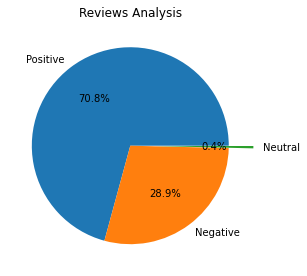

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(data.sentiment.value_counts(), labels = data.sentiment.value_counts().index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
